In [1]:
import json
import pandas as pd
import geopandas as gp
import matplotlib
import gtfs_kit as kit

In [3]:
feed = kit.feed.read_feed('../data/mmt_gtfs.zip', dist_units='km')
kit.validators.validate(feed, as_df=True, include_warnings=False)
feed = feed.drop_invalid_columns().clean()
week = feed.get_week(1)
feed.describe()

agency: dropping invalid column checkin_duration
agency: dropping invalid column bike_policy_url
calendar: dropping invalid column service_name
fare_attributes: dropping invalid column agency_id
feed_info: dropping invalid column feed_contact_email
feed_info: dropping invalid column feed_contact_url
routes: dropping invalid column service_id
routes: dropping invalid column route_service_name
routes: dropping invalid column bikes_allowed
shapes: dropping invalid column shape_code
stops: dropping invalid column agency_id
stops: dropping invalid column jurisdiction_id
stops: dropping invalid column relative_position
stops: dropping invalid column cardinal_direction
stops: dropping invalid column primary_street
stops: dropping invalid column address_range
stops: dropping invalid column cross_location
trips: dropping invalid column route_short_name
trips: dropping invalid column direction_name
trips: dropping invalid column shape_code
trips: dropping invalid column trip_type
trips: dropping

,indicator,value
0,agencies,[Metro Transit-City of Madison]
1,timezone,America/Chicago
2,start_date,20211205
3,end_date,20220514
4,num_routes,94
5,num_trips,13675
6,num_stops,1749
7,num_shapes,300
8,sample_date,20211209
9,num_routes_active_on_sample_date,43


In [5]:
routes = feed.get_routes(date=week[0])
trip_stats = feed.compute_trip_stats()
fts = feed.compute_feed_time_series(trip_stats, dates=week, freq="2H")
feed_stats = feed.compute_feed_stats(trip_stats, week)
rts = feed.compute_route_time_series(trip_stats, week, freq='12H')

/home/charles/.local/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


<AxesSubplot:>

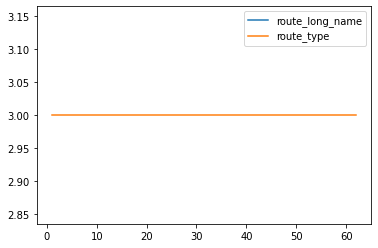

In [7]:
inds = ['service_distance', 'service_duration']
rids = ['9500', '9502']

rts.loc[:, (inds, )]

indicator           service_distance                                     \
route_id                        9899       9901        9902        9903   
datetime                                                                  
2021-12-06 00:00:00       279.212429  236.41758  199.380533  368.104625   
2021-12-06 12:00:00       485.377571  326.48142  274.802367  628.381675   
2021-12-07 00:00:00       279.212429  236.41758  199.380533  368.104625   
2021-12-07 12:00:00       485.377571  326.48142  274.802367  628.381675   
2021-12-08 00:00:00       279.212429  236.41758  199.380533  368.104625   
2021-12-08 12:00:00       485.377571  326.48142  274.802367  628.381675   
2021-12-09 00:00:00       279.212429  236.41758  199.380533  368.104625   
2021-12-09 12:00:00       485.377571  326.48142  274.802367  628.381675   
2021-12-10 00:00:00       279.212429  236.41758  199.380533  368.104625   
2021-12-10 12:00:00       485.377571  326.48142  274.802367  628.381675   
2021-12-11 00:00:00       236.525229  112.57980   96.365933  322.613844   
2021-12-11 12:00:00       485.377571  206.39630  175.948367  628.885956   
2021-12-12 00:00:00       236.525229  112.57980   96.365933  322.613844   
2021-12-12 12:00:00       485.377571  206.39630  175.948367  628.885956   

indicator                                                                \
route_id                   9904        9905     9907     9908      9909   
datetime                                                                  
2021-12-06 00:00:00  259.380675  125.569898  42.7280  50.9172   71.2261   
2021-12-06 12:00:00  425.775825  217.107102  50.2496  46.8645  125.6273   
2021-12-07 00:00:00  259.380675  125.569898  42.7280  50.9172   71.2261   
2021-12-07 12:00:00  425.775825  217.107102  50.2496  46.8645  125.6273   
2021-12-08 00:00:00  259.380675  125.569898  42.7280  50.9172   71.2261   
2021-12-08 12:00:00  425.775825  217.107102  50.2496  46.8645  125.6273   
2021-12-09 00:00:00  259.380675  125.569898  42.7280  50.9172   71.2261   
2021-12-09 12:00:00  425.775825  217.107102  50.2496  46.8645  125.6273   
2021-12-10 00:00:00  259.380675  125.569898  42.7280  50.9172   71.2261   
2021-12-10 12:00:00  425.775825  217.107102  50.2496  46.8645  125.6273   
2021-12-11 00:00:00  217.022817   59.703820      NaN      NaN   65.6178   
2021-12-11 12:00:00  428.981883  141.105080      NaN      NaN  114.6910   
2021-12-12 00:00:00  217.022817   59.703820      NaN      NaN   65.6178   
2021-12-12 12:00:00  428.981883  141.105080      NaN      NaN  114.6910   

indicator                        ... service_duration                       \
route_id                   9911  ...             9950       9951      9953   
datetime                         ...                                         
2021-12-06 00:00:00  251.972739  ...              NaN  10.450000  8.833333   
2021-12-06 12:00:00  359.829461  ...              NaN  19.633333  9.933333   
2021-12-07 00:00:00  251.972739  ...              NaN  10.450000  8.833333   
2021-12-07 12:00:00  359.829461  ...              NaN  19.633333  9.933333   
2021-12-08 00:00:00  251.972739  ...              NaN  10.450000  8.833333   
2021-12-08 12:00:00  359.829461  ...              NaN  19.633333  9.933333   
2021-12-09 00:00:00  251.972739  ...              NaN  10.450000  8.833333   
2021-12-09 12:00:00  359.829461  ...              NaN  19.633333  9.933333   
2021-12-10 00:00:00  251.972739  ...              NaN  10.450000  8.833333   
2021-12-10 12:00:00  359.829461  ...              NaN  19.633333  9.933333   
2021-12-11 00:00:00         NaN  ...             3.75        NaN       NaN   
2021-12-11 12:00:00         NaN  ...             8.25        NaN       NaN   
2021-12-12 00:00:00         NaN  ...             3.75        NaN       NaN   
2021-12-12 12:00:00         NaN  ...             8.25        NaN       NaN   

indicator                                                               \
route_id                 9954      9955      99